In [9]:
import os
import glob
import random
import json
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm.auto import tqdm,trange
import csv
# import torch
# import torchvision
# from torchvision import transforms
import matplotlib.pyplot as plt
from pandas import DataFrame

In [10]:
path = './aihub'

if os.path.isdir(path)==False: 
    os.makedirs(path+'/img')
else: print("exist_dir, plz check path_name ")

exist_dir, plz check path_name 


In [13]:
##경로 설정 
train_dir = '/hdd1/label/'# json파일이 있는 경로를 여기다 입력 
img_train_dir = '/hdd1/image2/'

In [14]:
#경로 확인 
glob.glob(train_dir+'/*')[0]


'/hdd1/label/1.간판'

In [15]:
image = []
for i in tqdm(glob.glob(img_train_dir+"/*"),total= len(glob.glob(img_train_dir+'/*'))):
    image.append(Image.open(i)) #image 객체 image에 append

  1%|          | 4440/406907 [00:45<1:08:53, 97.38it/s] 


KeyboardInterrupt: 

In [19]:
image.__len__()

4440

# crop 예시 

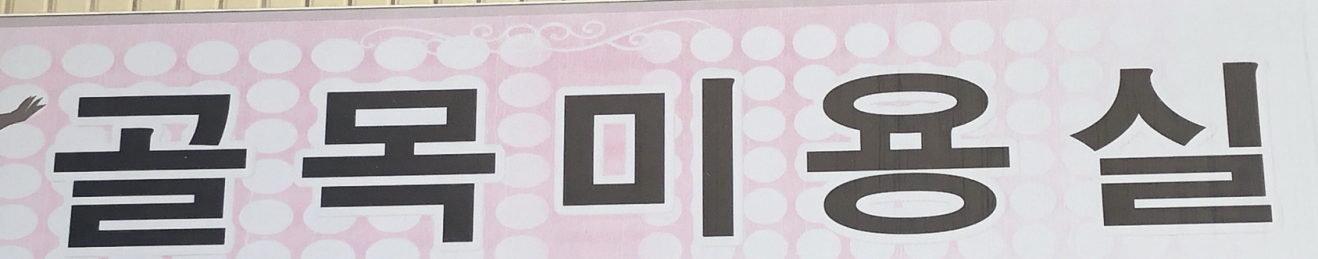

In [21]:
im = Image.open('/hdd1/SW/customocr/open/train/train_00001.png')
im

(100, 170)


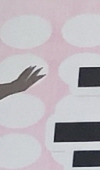

In [22]:
new_img = im.crop((0,30,100,200))
print(new_img.size)
new_img

# json파일 읽음 

In [25]:
train_dir

'/hdd1/label/'

In [42]:
json_list = []
for i in tqdm(glob.glob(train_dir+'/*/*/*'),total=len(glob.glob(train_dir+'/*/*/*'))):
    if i.split('.')[-1]=="zip":  continue
    else: 
        if i[-4:] != 'json': 
            print(i[-4:], i)
            continue
        
        with open(i,encoding='utf8') as f:
            json_list.append(json.load(f))

  3%|▎         | 3719/142656 [00:00<00:07, 18954.02it/s]

내간판2 /hdd1/label/1.간판/4.실내간판/실내간판2
내간판1 /hdd1/label/1.간판/4.실내간판/실내간판1


 16%|█▌        | 22851/142656 [00:38<07:51, 253.97it/s]  

새 폴더 /hdd1/label/1.간판/5.실내안내판/새 폴더
 (2) /hdd1/label/1.간판/5.실내안내판/새 폴더 (2)
형간판2 /hdd1/label/1.간판/1.가로형간판/가로형간판2
형간판4 /hdd1/label/1.간판/1.가로형간판/가로형간판4
형간판1 /hdd1/label/1.간판/1.가로형간판/가로형간판1
형간판5 /hdd1/label/1.간판/1.가로형간판/가로형간판5
형간판3 /hdd1/label/1.간판/1.가로형간판/가로형간판3


 17%|█▋        | 24379/142656 [00:44<03:37, 544.61it/s]


KeyboardInterrupt: 

# json 파일로부터 crop할 영역과 label추출

In [43]:
label = []
lotate  = []
for idx,i in tqdm(enumerate(json_list),total=len(json_list)):
    for jdx,j in enumerate(i['annotations']):
        lotate.append(j['bbox'])
        label.append(j['text'])

100%|██████████| 24369/24369 [00:00<00:00, 233688.69it/s]


In [44]:
len(label), len(lotate)
#전체 len이 같아야 함 

(106337, 106337)

In [45]:
#좌표를 위해서 처리함 Image.crop은 left, top, right, under임 
#그러나 json은 x,y,width, height
for i in trange(len(lotate)):
    lotate[i][2] = lotate[i][0]+lotate[i][2]
    lotate[i][3] = lotate[i][1]+lotate[i][3]

100%|██████████| 106337/106337 [00:00<00:00, 1027321.80it/s]


In [46]:
print(f'{path}/train_data_1.jpg')

./aihub/train_data_1.jpg


In [54]:
new_image = []
alpha = 0.5 #resize할 범위 만약 할거면 값 조정해서 resize해서 저장하면 됨 
for idx,i in tqdm(enumerate(lotate),total =len(lotate)):
    crop_image = image[idx].crop(i)
    
    # crop_image.resize((crop_image.size[0]*alpha,crop_image.size[1]*alpha))#resize하고 싶은 비율 설정 
    crop_image.save(f'{path}/img/train_data_{idx}.jpg')

  0%|          | 336/106337 [00:03<17:05, 103.41it/s]


KeyboardInterrupt: 

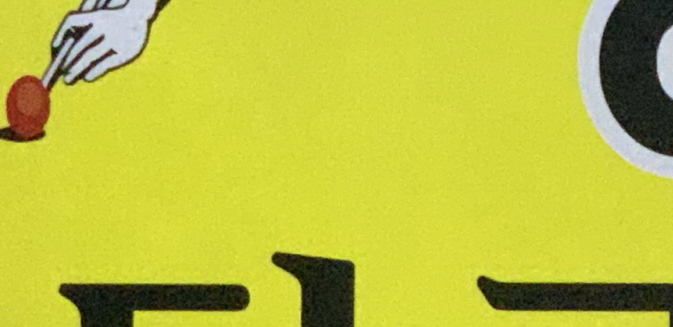

In [55]:
crop_image

# label csv 생성 

In [63]:
path

'./aihub'

In [77]:
data = DataFrame(label)
data.to_csv(path+'/label.csv',sep=',',encoding='utf8',index=False)

In [68]:
####
###csv를 사용해서 만들때 
# with open(path+'/label.csv','w',encoding='utf8') as f:
#     write = csv.writer(f,delimiter='\n')
#     next(write)
#     write.writerows(label)

TypeError: '_csv.writer' object is not an iterator